Импортируем необходимые библиотеки

In [20]:
from datetime import datetime

import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

Загружаем данные

In [21]:
train = pd.read_csv('train.csv', low_memory=False)
test = pd.read_csv('test.csv', low_memory=False)
submission = pd.read_csv('sample_submission.csv')

выведем побольше колонок и строк

In [5]:
max_columns = 30
max_rows = 30
pd.set_option('display.max_columns', max_columns)
pd.set_option('display.max_rows', max_rows)

Рассмотрим, какие типы данных у столбцов и сколько пропусков:

In [10]:
display(train.head()) #display нужен для того, чтобы выводить результаты обеих строк
train.info() 

,overall,verified,reviewTime,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,userid,itemid,rating
0,5.0,True,"10 4, 2016",B01CPNIEQG,Heather,These are my FAVORITE spices in my collection....,Must Add to your Spice kitchen!,1475539200,NaN,NaN,NaN,102179,37138,1.0
1,5.0,True,"03 1, 2016",B006F63M8U,Linda Odom,Add A package to my Coffee and it makes a good...,Milk Chocolate Swiis MIss Hot Cocoa Mix,1456790400,NaN,{'Size:': ' 60-0.73 oz Envelopes'},NaN,3625,17322,1.0
2,5.0,True,"06 26, 2016",B00112O8NG,DesertBlossom,"I love the Torani syrups, but not the prices o...","Love these sugar free syrups, but didn't love ...",1466899200,28,NaN,NaN,39495,5600,1.0
3,5.0,True,"09 5, 2013",B00MRAQUM8,Connie L. Reaves,Very fragrant. The price can't be beat. I do l...,Nice !,1378339200,NaN,NaN,NaN,72854,30249,1.0
4,5.0,True,"09 14, 2016",B000R7RN0G,Mike P.,These are my favorite jalapeno chips so far. T...,These are my favorite jalapeno chips so far,1473811200,NaN,{'Flavor:': ' Jalapeo'},NaN,74859,4349,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857895 entries, 0 to 857894
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         857895 non-null  float64
 1   verified        857895 non-null  bool   
 2   reviewTime      857895 non-null  object 
 3   asin            857895 non-null  object 
 4   reviewerName    857719 non-null  object 
 5   reviewText      857616 non-null  object 
 6   summary         857725 non-null  object 
 7   unixReviewTime  857895 non-null  int64  
 8   vote            118740 non-null  object 
 9   style           444406 non-null  object 
 10  image           7142 non-null    object 
 11  userid          857895 non-null  int64  
 12  itemid          857895 non-null  int64  
 13  rating          857895 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(8)
memory usage: 85.9+ MB


In [41]:
display(test.head())
test.info() 

,verified,reviewTime,asin,reviewerName,unixReviewTime,vote,style,image,userid,itemid,Id
0,True,"10 1, 2016",B001E5E3X0,Rudys Mom,1475280000,NaN,NaN,NaN,68877,7506,0
1,True,"06 29, 2014",B005BYXX5E,pharg,1404000000,2,NaN,NaN,50442,15530,1
2,True,"05 19, 2015",B0052OK6OO,dhalex,1431993600,NaN,NaN,NaN,64349,15049,2
3,True,"10 5, 2014",B003SO8HGE,Vanessa,1412467200,NaN,{'Flavor:': ' Sweet Rose'},NaN,26206,11957,3
4,True,"11 11, 2013",B003XUJ564,R Mohrman,1384128000,3,"{'Size:': ' 15 Ounce (Pack of 12)', 'Flavor:':...",NaN,59366,12173,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285965 entries, 0 to 285964
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   verified        285965 non-null  bool  
 1   reviewTime      285965 non-null  object
 2   asin            285965 non-null  object
 3   reviewerName    285918 non-null  object
 4   unixReviewTime  285965 non-null  int64 
 5   vote            39462 non-null   object
 6   style           147680 non-null  object
 7   image           2368 non-null    object
 8   userid          285965 non-null  int64 
 9   itemid          285965 non-null  int64 
 10  Id              285965 non-null  int64 
dtypes: bool(1), int64(4), object(6)
memory usage: 22.1+ MB


In [14]:
#вот так виднее сколько пропусков для каждого признака
train.isnull().sum()

overall                0
verified               0
reviewTime             0
asin                   0
reviewerName         176
reviewText           279
summary              170
unixReviewTime         0
vote              739155
style             413489
image             850753
userid                 0
itemid                 0
rating                 0
dtype: int64

In [15]:
test.isnull().sum()

verified               0
reviewTime             0
asin                   0
reviewerName          47
unixReviewTime         0
vote              246503
style             138285
image             283597
userid                 0
itemid                 0
Id                     0
dtype: int64

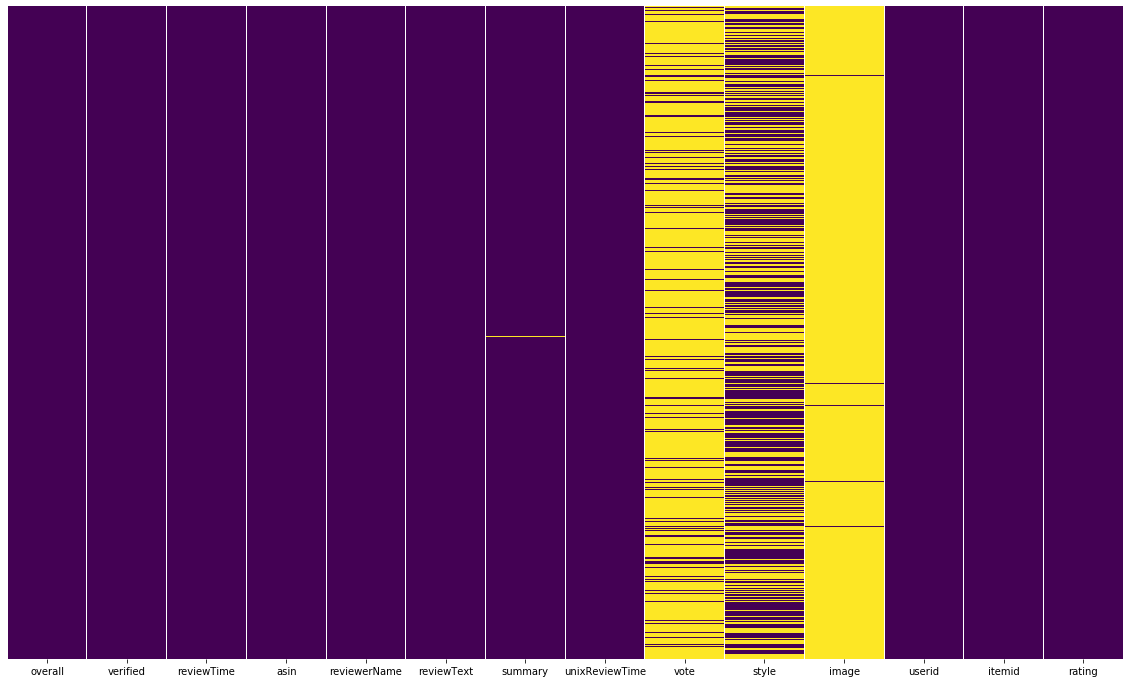

In [63]:
#а вот так еще виднее где пропуски
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

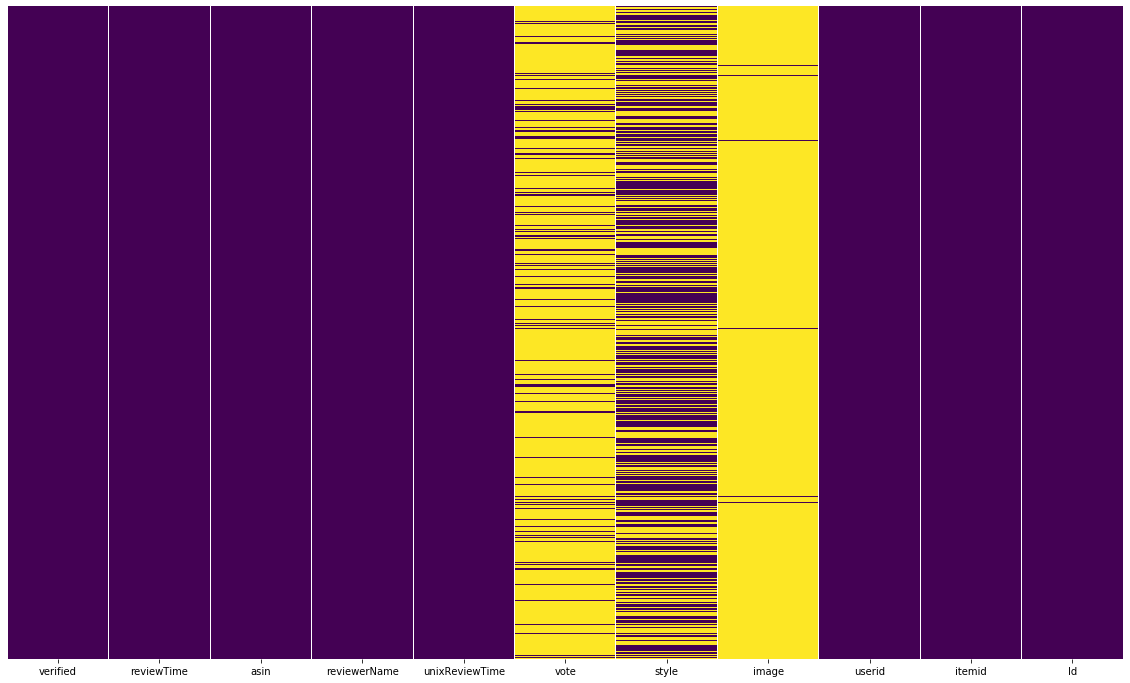

In [64]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

__Расшифровка признаков__

overall - распределениe первоначальной оценки 

verified - был ли отзыв верифицирован

reviewTime - когда был отзыв написан

asin - кодировка товара, на его основании создаются itemid

reviewerName - имя пользователя

reviewText - текст отзыва

summary - сжатый отзыв

unixReviewTime  - Unix-время

vote - количество голосований за отзыв

style - метаданные, какие-то характеристики товара

image - изображение продукта

userid - id пользователя

itemid - id товара

id - id для предсказания

rating - рейтинг для предсказания, тагет

заменим булевы значения на 1 и 0

In [35]:
train = train.replace(to_replace = True, value = 1)
train = train.replace(to_replace = False, value = 0)
test = test.replace(to_replace = True, value = 1)
test = test.replace(to_replace = False, value = 0)

Напишем функцию, которая покажет нам распределение признаков, выдаст процент пропусков и покажет выбросы для столбцов, у которых определены значения (по описанию датасета)

In [37]:
def desription(col, boundaries = None):
    print('Столбец', col)
    print('Распределение признака:')
    fig, ax = plt.subplots()
    if train.loc[:, col].dtypes == np.dtype('O'): # Проверка на строковый тип данных
        sns.countplot(train.loc[:, col], ax=ax)
        plt.show()
    else:
        
        train.loc[:, col].hist(ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        plt.show()
        if boundaries is not None: # Проверка на наличие выбросов по информации из датасета
            if train.loc[(~train.loc[:, col].between(boundaries[0], boundaries[1]))&
                       pd.notnull(train.loc[:, col])].shape[0] > 0:
                print('Найдены выбросы:')
                display(train.loc[(~train.loc[:, col].between(boundaries[0], boundaries[1]))&
                       pd.notnull(train.loc[:, col])])
                
    print('Процент пропусков:', str(round(100 - train.loc[:, col].count()/train.shape[0]*100, 2)) + '%')
    print()
    print('Детальное описание:')
    print(train.loc[:, col].describe())

Столбец overall
Распределение признака:


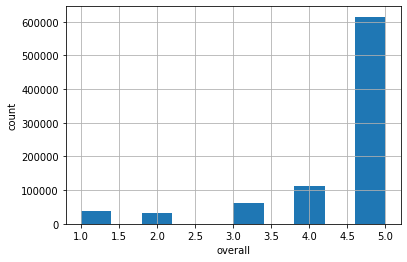

Процент пропусков: 0.0%

Детальное описание:
count    857895.000000
mean          4.441695
std           1.064655
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64
Столбец verified
Распределение признака:


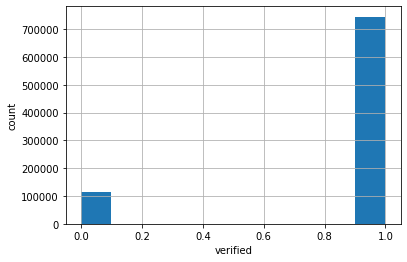

Процент пропусков: 0.0%

Детальное описание:
count    857895.000000
mean          0.868688
std           0.337742
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: verified, dtype: float64
Столбец asin
Распределение признака:


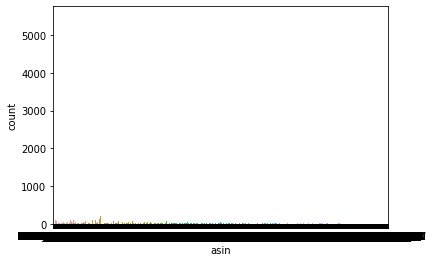

Процент пропусков: 0.0%

Детальное описание:
count         857895
unique         41302
top       B00BUKL666
freq            5491
Name: asin, dtype: object


In [40]:
desription('overall', boundaries=(1,5))
desription('verified')
desription('reviewTime') # нет смысла запускать эту функцию для даты
desription('asin')
desription('reviewerName')
desription('reviewText')
desription('summary')
desription('unixReviewTime') # нет смысла запускать эту функцию для даты
desription('vote')
desription('style') # признак содержит метаданные
desription('image') # признак содержит ссылку на картинку
desription('rating')

Столбец reviewerNamе содержит разнообразные произвольные и даже вымышленные значения, не думаю, что они нам помогут для рекомендаций, пользователя будем идентифицировать по userid, а reviewerNamе удалим.

Столбцы vote, style, image содержат значительное количество пропусков, их тоже можно удалить   
Проделаем это сразу для обоих датасетов

Столбцы reviewText и summary содержат текстовую информацию из отзыва, возможно это будет использовано в дальнешнем

Столбцы reviewTime и unixReviewTime - это даты отзывов в разных форматах

In [55]:
train.drop(['reviewerName', 'vote', 'style', 'image'], axis = 1, inplace=True)
test.drop(['reviewerName', 'vote', 'style', 'image'], axis = 1, inplace=True)

Теперь посмотрим на распредление оценок в зависимости от рейтинга

In [49]:
train.groupby(['overall']).rating.mean()

overall
1.0    0.0
2.0    0.0
3.0    0.0
4.0    1.0
5.0    1.0
Name: rating, dtype: float64

То есть, пользователю рекомендованы товары с оценкой 4 и выше, что и было написано в условии

asin - кодировка товара, на его основании создаются itedid, он нам будет нужен для формирования таблицы item_features

In [60]:
train.groupby(['asin']).itemid.mean()

asin
4639725043        1
4639725183        0
5463213682        2
9742356831        3
B00004S1C5        4
              ...  
B01HJ2OFYI    38319
B01HJ4FWGG    38320
B01HJ7QPKU    38321
B01HJCUNOO    38322
B01HJF6FRA    38323
Name: itemid, Length: 41302, dtype: int64

__Метасловарь для продуктов__

Будем использовать данные по товарам из файла meta_Grocery_and_Gourmet_Food.json для формирования матрицы признаков товаров (item_features) и самое главное, названия товаров нужны для прототипа

In [22]:
import json
meta = []
with open('meta_Grocery_and_Gourmet_Food.json', 'r') as in_file:
    for line in in_file:
        meta.append(json.loads(line))

посмотрим, что представляет из себя файл json

In [38]:
type(meta), len(meta), type(meta[0])

(list, 287209, dict)

Метафайл состоит из списка словарей, описывающих продукты. 

Длина словарей разная: {4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

Ключи такие: {'also_buy', 'also_view', 'asin', 'brand', 'category', 'date', 'description', 'details', 'feature', 'fit', 'image', 'main_cat', 'price', 'rank', 'similar_item', 'tech1', 'title'} 

Сделаем из этого метафайла датафрейм с признаками товаров. 

Потом в модель добавим разреженную матрицу, с указанием category каждого продукта. Возьмем следующие признаки: 'asin', ''brand', 'category', 'main_cat', description, price, В категории последних элементов - 1175 штук; предпоследних - 234; первых - 1; вторых - 26. main_cat - 27 штук (совпадает со второй позицией в категории) brands - 38915 штук.

посмотрим, что получилось

In [23]:
items = pd.DataFrame(meta)
items.head()

,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy,image,date,feature,details,similar_item,tech1,fit
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...","[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,Ariola Imports,"165,181inGroceryGourmetFood(","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,$41.91,0681727810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...","[Shipped from UK, please allow 10 to 21 busine...",Trim Healthy Mama Xylitol,NaN,"315,867inGroceryGourmetFood(",NaN,Grocery,NaN,0853347867,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",[Jazz up your cakes with a sparkling monogram ...,Letter C - Swarovski Crystal Monogram Wedding ...,Unik Occasions,">#669,941 in Kitchen & Dining (See Top 100 in ...",[B07DXN65TF],Amazon Home,$29.95,1888861118,NaN,NaN,"September 21, 2010",NaN,NaN,NaN,NaN,NaN
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...","[Large Letter - Height 4.75""]",Letter H - Swarovski Crystal Monogram Wedding ...,Other,">#832,581 in Kitchen & Dining (See Top 100 in ...",NaN,Amazon Home,$11.45,1888861517,NaN,NaN,"September 11, 2011","[Large Letter - Height 4.75""]",NaN,NaN,NaN,NaN
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...","[4.75""]",Letter S - Swarovski Crystal Monogram Wedding ...,Unik Occasions,">#590,999 in Kitchen & Dining (See Top 100 in ...",NaN,Amazon Home,$15.00,1888861614,NaN,NaN,"September 11, 2011","[4.75"" height]",NaN,NaN,NaN,NaN


выведем основую информацию о получившемся датафрейме

In [24]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287209 entries, 0 to 287208
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      287209 non-null  object
 1   description   251802 non-null  object
 2   title         287205 non-null  object
 3   brand         275787 non-null  object
 4   rank          275494 non-null  object
 5   also_view     121012 non-null  object
 6   main_cat      285716 non-null  object
 7   price         132136 non-null  object
 8   asin          287209 non-null  object
 9   also_buy      83332 non-null   object
 10  image         150214 non-null  object
 11  date          9663 non-null    object
 12  feature       16374 non-null   object
 13  details       273323 non-null  object
 14  similar_item  256 non-null     object
 15  tech1         744 non-null     object
 16  fit           4 non-null       object
dtypes: object(17)
memory usage: 37.3+ MB


Создадим фичи для продуктов
сосчитаем, сколько всего отзывов на товар было оставлено

In [25]:
items['count_rev'] = train[['itemid', 'unixReviewTime']].groupby('itemid').count() 
items['asin'] = train[['itemid', 'asin']].groupby('itemid').first()

создадим новую колонку item_id, потом по ней и будем выводить рекомендованный товар

In [26]:
items['item_id'] = df.index

добавим среднюю оценку для каждого товара

In [27]:
items['overall_mean'] = train[['itemid', 'overall']].groupby('itemid').mean()

Посмотрим на зависимость средней оценки от количетсва отзывов

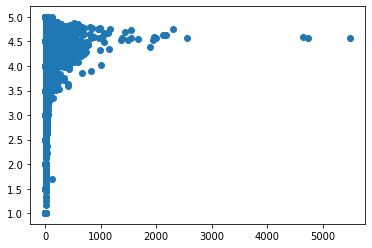

In [11]:
plt.scatter(items.count_rev, items.overall_mean)

По нашему графику видно, что для часто покупаемых товаров характерны высокие оценки

оставим категорию самую последнюю

In [28]:
items['category'] = items['category'].apply(lambda x: x[-1])

присваиваем каждой категории свой id

In [29]:
set_category = set(items.category.unique())
print(f'всего категорий: {len(set_category)}')
mapper = dict(zip(set_category, range(len(set_category))))
items['cat_id'] = items['category'].apply(lambda x: mapper[x])

всего категорий: 1175


Заменяем пропуски (самый простой вариант - сделала замену пропусков на прочее)

In [30]:
items['main_cat'].fillna('Other', inplace = True)
items['brand'].fillna('Other', inplace = True)
items['price'].fillna('NA', inplace = True)

оставляем только часть колонок

In [31]:
items = items[['item_id','category', 'title', 'brand', 'main_cat', 'price', 'asin', 'count_rev', 'overall_mean','cat_id']]
items.head()

,item_id,category,title,brand,main_cat,price,asin,count_rev,overall_mean,cat_id
0,0,Gouda,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,Ariola Imports,Grocery,$41.91,4639725183,8.0,4.875000,168
1,1,Xylitol,Trim Healthy Mama Xylitol,Other,Grocery,NA,4639725043,21.0,4.190476,1027
2,2,Cake Toppers,Letter C - Swarovski Crystal Monogram Wedding ...,Unik Occasions,Amazon Home,$29.95,5463213682,7.0,4.857143,410
3,3,Cake Toppers,Letter H - Swarovski Crystal Monogram Wedding ...,Other,Amazon Home,$11.45,9742356831,74.0,4.581081,410
4,4,Cake Toppers,Letter S - Swarovski Crystal Monogram Wedding ...,Unik Occasions,Amazon Home,$15.00,B00004S1C5,10.0,4.400000,410


удалим дубликаты из датасета с описанием товаров

In [32]:
items=items.drop_duplicates(keep='first')

удалим строки с пропусками

In [33]:
items = items.dropna(axis=0) 

In [34]:
items

,item_id,category,title,brand,main_cat,price,asin,count_rev,overall_mean,cat_id
0,0,Gouda,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,Ariola Imports,Grocery,$41.91,4639725183,8.0,4.875000,168
1,1,Xylitol,Trim Healthy Mama Xylitol,Other,Grocery,NA,4639725043,21.0,4.190476,1027
2,2,Cake Toppers,Letter C - Swarovski Crystal Monogram Wedding ...,Unik Occasions,Amazon Home,$29.95,5463213682,7.0,4.857143,410
3,3,Cake Toppers,Letter H - Swarovski Crystal Monogram Wedding ...,Other,Amazon Home,$11.45,9742356831,74.0,4.581081,410
4,4,Cake Toppers,Letter S - Swarovski Crystal Monogram Wedding ...,Unik Occasions,Amazon Home,$15.00,B00004S1C5,10.0,4.400000,410
...,...,...,...,...,...,...,...,...,...,...
41315,41315,Mixed Nuts,var aPageStart = (new Date()).getTime();\nvar ...,Planters,Grocery,$35.99,B01H8ET97A,4.0,4.000000,797
41316,41316,Oatmeal,Quaker Simple Harvest Maple Brown Sugar With P...,Quaker,Grocery,NA,B01H8ET9G6,3.0,4.666667,900
41317,41317,Ground Coffee,"Folgers Gourmet Selections Coffee, Morning Caf...",Folgers,Grocery,NA,B01H8FA2U2,4.0,4.250000,1154
41318,41318,Breadsticks,Salem Baking Company Original Cheddar Cheese S...,Salem Baking Co.,Grocery,NA,B01HGBEYRU,2.0,5.000000,784


In [35]:
len(items)

41301

запишем получившийся датафрейм в файл

In [19]:
items.to_csv('items.csv')

вот эту цифру потом укажем в прототипе, чтобы пользователь знал, из какого диапазона выбирать

Если не делать фичи для айтемов, хватит и 2х колонок, и главное места в heroku будет занимать меньше, поэтому сделаем 2й вариант датасета, только с item_id и названием товара

In [36]:
item = items[['item_id', 'title']]

тоже запишем получившийся датафрейм в файл

In [37]:
item.to_csv('item.csv')

__Выводы:__

в этом задании кажется логичным сконцентрироваться на том, чтобы попробовать разные библиотеки, разведывательному анализу данных было уделено немного внимания. Самое главное, что в необходимых признаках (itemid, userid) и таргете (rating) пропусков нет. 

Также было создано 2 датафрейма с характеристиками продуктов (для создания item_features и более облегченный вариант для прототипа)